# Analysis of words given to artists

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (150, 5)
plt.rcParams['font.family'] = 'sans-serif'
# Increase pandas width
pd.set_option('display.width', 190)
# Inline plots yay
%matplotlib inline

In [2]:
words_file = 'words.csv'
words_raw_data = pd.read_csv(words_file)


In [3]:
words_raw_data.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0,NaN,0,0,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN
1,35,29118,Never heard of,NaN,NaN,0,NaN,0,0,NaN,...,0,0,NaN,0,0,0,0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0,NaN,0,0,NaN,...,0,0,NaN,0,0,0,0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0,0,NaN,...,0,0,NaN,0,0,0,0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0,0,NaN,...,0,0,NaN,0,0,0,0,0,NaN,NaN


## Frequency of words given

In [4]:
word_frequency = words_raw_data.copy().drop(['Artist', 'User', 'HEARD_OF', 'OWN_ARTIST_MUSIC', 'LIKE_ARTIST'], axis=1)
word_frequency.head()

,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,Laid back,Wholesome,Uplifting,Intriguing,Legendary,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,NaN,0,NaN,0,0,0,NaN,0,0,NaN,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN
1,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,0,0,0,0,0,NaN,NaN
2,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,0,0,0,0,0,NaN,NaN
3,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,0,0,0,0,0,NaN,NaN
4,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,0,0,0,0,0,NaN,NaN


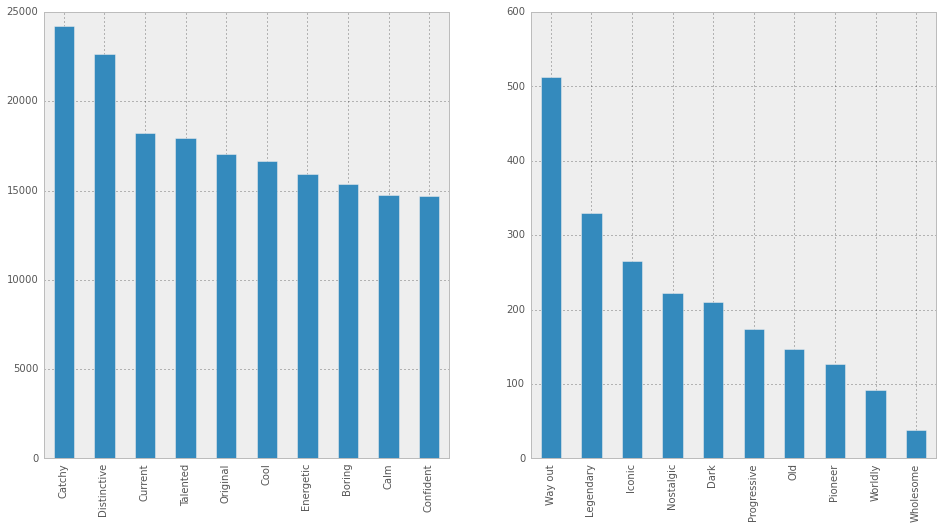

In [5]:
word_frequency_sorted = word_frequency.sum().dropna()
word_frequency_sorted = pd.Series.order(word_frequency_sorted, ascending=False)

# Show only the top and bottom 10
fig, axis = plt.subplots(1,2)
word_frequency_sorted[:10].plot(kind='bar', ax=axis[0])
word_frequency_sorted[len(word_frequency_sorted) - 10:].plot(kind='bar', figsize=(16,8),  ax=axis[1])

## Most frequently used words by gender

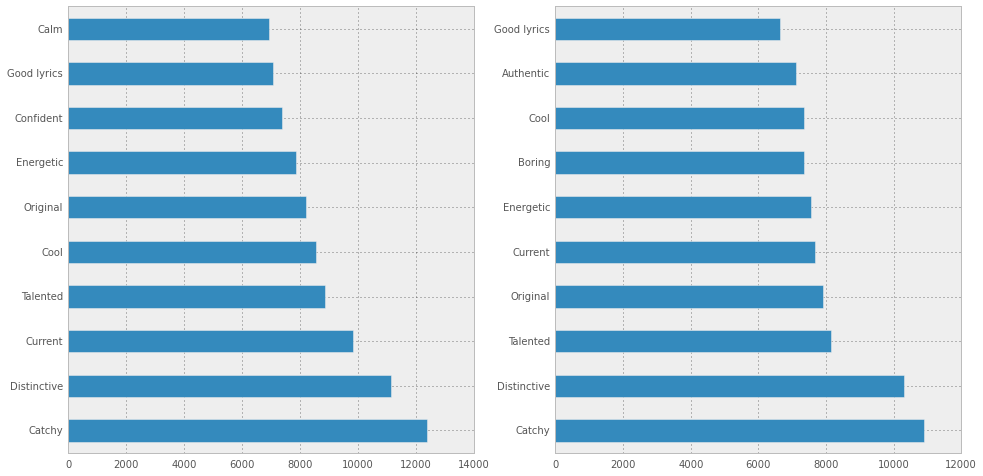

In [18]:
user_gender_data = pd.read_csv('users.csv', usecols=['RESPID', 'GENDER'])
words_with_gender = pd.merge(words_raw_data.copy(), user_gender_data, left_on='User', right_on='RESPID')
words_with_gender = words_with_gender.drop(['User', 'Artist', 'OWN_ARTIST_MUSIC', 'LIKE_ARTIST', 'RESPID'], axis=1)

female_words_count = words_with_gender[words_with_gender['GENDER'] == 'Female'].sum()#.groupby('GENDER').sum().dropna(axis=1) # Drop the "Unnamed" entries
male_words_count = words_with_gender[words_with_gender['GENDER'] == 'Male'].sum()#.groupby('GENDER').sum().dropna(axis=1)
female_words_count.sort(ascending=False)
male_words_count.sort(ascending=False)

most_used_female = female_words_count[:10]
most_used_male = male_words_count[:10]

fig, axis = plt.subplots(1, 2)
most_used_female.plot( kind='barh', figsize=(16,8), ax=axis[0])
most_used_male.plot( kind='barh', ax=axis[1])

In [14]:
most_used_female

Catchy         12368
Distinctive    11117
Current         9800
Talented        8843
Cool            8524
Original        8197
Energetic       7849
Confident       7374
Good lyrics     7060
Calm            6924
dtype: float64